## Spatial equity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import cartogram
import netCDF4

from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.animation import FuncAnimation


An issue in modelling is the number of regions that exist in the model, and the way difference in living conditions are being taken into account. 

In [2]:
variables = ['define_tot_eq_define_total_impact',
       'dice_tot_eq_dice_total_impact',   
       'witness_tot_eq_witness_total_impact']

In [6]:
ds_path = r'..\..\..\results\final_test.nc'
ds = xr.open_dataset(ds_path)

data = ds[variables].to_dataframe().reset_index()
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

ds.close()

In [7]:
data.head()

,Run,time,region,define_tot_eq_define_total_impact,dice_tot_eq_dice_total_impact,witness_tot_eq_witness_total_impact
0,0,2005.0,AUSTRIA,0.000000,0.000000,0.000000
1,0,2005.0,BELGIUM,644.310354,778.328031,1315.126518
2,0,2005.0,BULGARIA,25.010835,30.213133,51.050573
3,0,2005.0,CROATIA,34.824074,42.067542,71.080749
4,0,2005.0,CYPRUS,21.452018,25.914075,43.786535


In [18]:
decades = np.arange(2010, 2051, 10)


map = gpd.read_file(r'../3_modelling\geography\output_countries\countries.shp')

vmin = 0 #data[variables].values.min()
vmax = 1000000 #data[variables].values.max()

column_titles = ['DEFINE', 'DICE', 'WITNESS']

Merging data for 2010 and define_tot_eq_define_total_impact
Merging data for 2020 and define_tot_eq_define_total_impact
Merging data for 2030 and define_tot_eq_define_total_impact
Merging data for 2040 and define_tot_eq_define_total_impact
Merging data for 2050 and define_tot_eq_define_total_impact
Merging data for 2010 and dice_tot_eq_dice_total_impact
Merging data for 2020 and dice_tot_eq_dice_total_impact
Merging data for 2030 and dice_tot_eq_dice_total_impact
Merging data for 2040 and dice_tot_eq_dice_total_impact
Merging data for 2050 and dice_tot_eq_dice_total_impact
Merging data for 2010 and witness_tot_eq_witness_total_impact
Merging data for 2020 and witness_tot_eq_witness_total_impact
Merging data for 2030 and witness_tot_eq_witness_total_impact
Merging data for 2040 and witness_tot_eq_witness_total_impact
Merging data for 2050 and witness_tot_eq_witness_total_impact


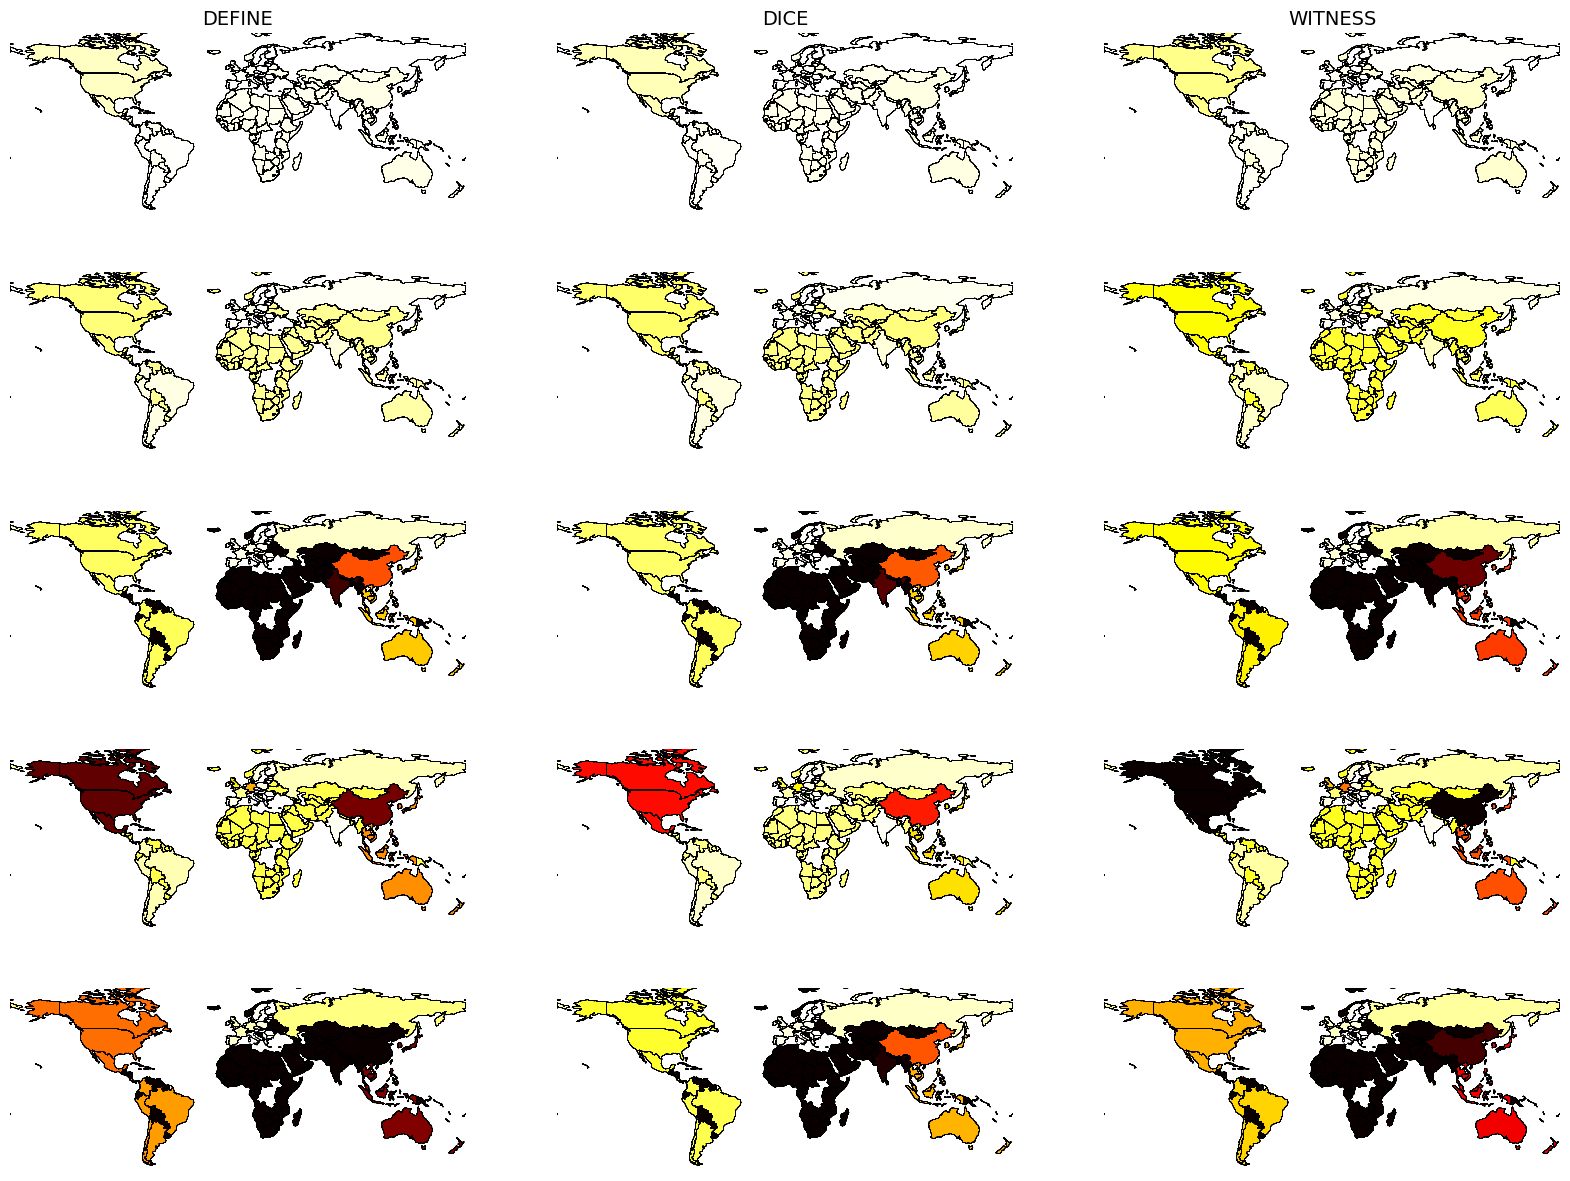

In [10]:

fig, ax = plt.subplots(len(decades), len(variables), figsize=(20, 15))


for j, r in enumerate(variables):
    for i, d in enumerate(decades):
        map_variable = map.merge(data[data['time'] == d], left_on='region', right_on='region')
        print(f'Merging data for {d} and {r}')

        ax[i, j].set_axis_off()
        ax[i, j].set_xlim(-180, 180)
        ax[i, j].set_ylim(-60, 80)

        map_variable.boundary.plot(ax=ax[i, j], linewidth=0.2, color='black', alpha=0.5)
        map_variable.plot(column=r, ax= ax[i,j], cmap='hot_r', vmin=vmin, vmax=vmax)

        if i == 0:  # Ajouter un titre à la première ligne de chaque colonne
            ax[i, j].set_title(column_titles[j], fontsize=14)

        if j == 0:
            ax[i, j].set_ylabel(f'{d}', fontsize=18, rotation=90)
        
# Créer un objet Normalize pour normaliser les valeurs dans [vmin, vmax] à [0, 1]
norm = Normalize(vmin=vmin, vmax=vmax)

# Créer une ScalarMappable pour mapper les valeurs normalisées à une colormap
sm = ScalarMappable(cmap='hot_r', norm=norm)
sm.set_array([])  # Mettre un tableau vide, les données ne sont pas encore nécessaires

# Ajout d'une colorbar commune pour toutes les sous-graphiques
#cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', shrink=0.6)
#cbar.set_label('Damage level')  # Définir le label de la colorbar

#plt.tight_layout()

#plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.1, hspace=0.1)


plt.savefig('../../../../Memoire/results/carte_progressive.png')


### Cartogram

In [27]:

map_variable_dissolved = map.merge(data[(data['time'] == 2040) & (data['Run'] == 1)], left_on='region', right_on='region').dissolve(by='WILIAM cod', aggfunc={'define_tot_eq_define_total_impact': 'sum'}).reset_index()
c = cartogram.Cartogram(map_variable_dissolved, 'define_tot_eq_define_total_impact')

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\cartogram\cartogram.py:268: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return self.geometry.area.sum()
c:\Users\gabriel.genel

In [28]:
c.explore()

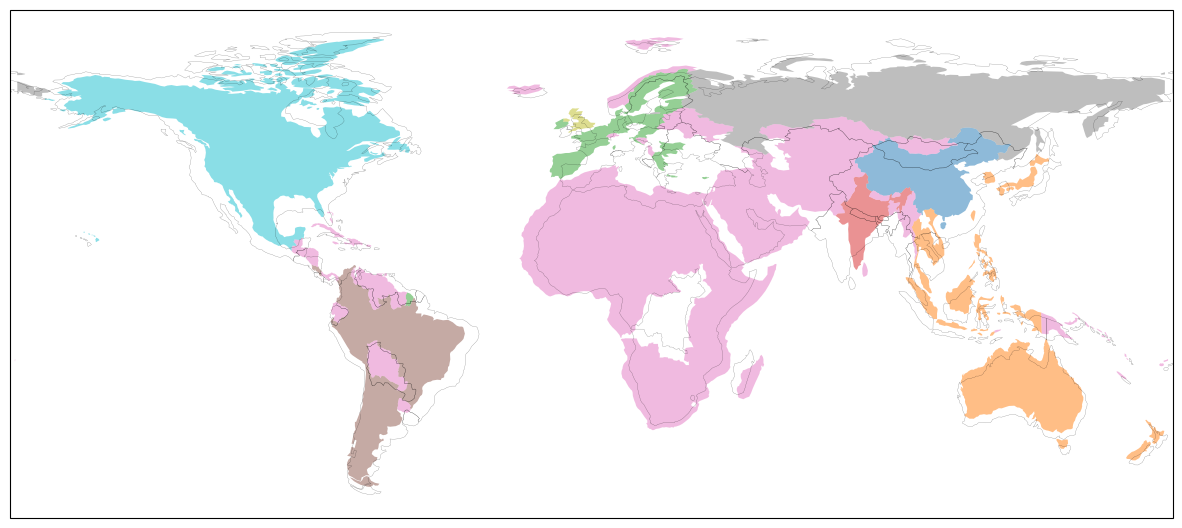

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})

map_variable.boundary.plot(ax=ax, linewidth=0.2, color='black', alpha=0.5)

c.plot('WILIAM cod',  ax=ax, alpha=0.5)

plt.savefig('../../../../Memoire/results/cartogramme.png')
plt.show()

### Maps showing the effects of the coefficients

In [ ]:
data['actualised_damage_'] = data['define_tot_eq_define_total_impact'] / (1 + 0.01)**(data['time'] - 2020)

In [16]:
map_full = map.merge(data, left_on='region', right_on='region')
map_full_dissolved = map_full.dissolve(by='WILIAM cod', aggfunc={'define_tot_eq_define_total_impact': 'sum', 'dice_tot_eq_dice_total_impact': 'sum', 'witness_tot_eq_witness_total_impact':'sum' }).reset_index()

In [12]:
damage_aggregated = map_variable

# Supposons que tes données soient dans un DataFrame appelé damage_aggregated
# avec des colonnes 'impact', 'coefficient' et 'exponent'

# Discrétiser les valeurs du coefficient en 3 catégories : faible, moyen, élevé
damage_aggregated['coefficient_category'] = pd.qcut(damage_aggregated['coefficient'], q=3, labels=["Faible", "Moyen", "Élevé"])

# Discrétiser les valeurs de l'exposant en 3 catégories : faible, moyen, élevé
damage_aggregated['exponent_category'] = pd.qcut(damage_aggregated['exponent'], q=3, labels=["Faible", "Moyen", "Élevé"])

# Préparer la figure pour la grille 3x3
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

# Boucle pour parcourir chaque combinaison des catégories de coefficient et d'exposant
for i, coef_cat in enumerate(["Faible", "Moyen", "Élevé"]):
    for j, exp_cat in enumerate(["Faible", "Moyen", "Élevé"]):
        # Filtrer les données correspondant à la combinaison actuelle
        subset = damage_aggregated[(damage_aggregated['coefficient_category'] == coef_cat) & 
                                   (damage_aggregated['exponent_category'] == exp_cat)]
        
        # Tracer une carte des impacts pour ce sous-ensemble de données
        sns.scatterplot(x=subset['coefficient'], y=subset['impact'], ax=axes[i, j])
        
        # Ajouter un titre spécifique à chaque sous-graphe
        axes[i, j].set_title(f"Coef: {coef_cat}, Exp: {exp_cat}")
        axes[i, j].set_xlabel("Coefficient")
        axes[i, j].set_ylabel("Impact")

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout()

# Afficher la figure
plt.show()


KeyError: 'coefficient'